# Expplore Rank Change for Fidelities 

In [46]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [47]:
databse_name = "fehring_growing_nn_new_seeded"
table_name = "net2deeper_budget200"

In [48]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks")
smac_costs = smac_costs[smac_costs["experiment_id"] ==1]

2024-08-12 15:10:14,173  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-12 15:10:14,174  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth


2024-08-12 15:10:14,174  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-12 15:10:14,174  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-12 15:10:14,175  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-08-12 15:10:14,176  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-08-12 15:10:14,176  | py-experimenter - WARNING  | No values given for keyfield total_timesteps

In [49]:
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-08-08 13:29:17,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9954
2,3,1,2024-08-08 13:35:08,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9476
4,5,1,2024-08-08 13:41:40,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9054
8,9,1,2024-08-08 13:59:07,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.7928
14,15,1,2024-08-08 14:18:11,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.3732


In [50]:
# Disregard configs with a budget = 4]
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-08-08 13:29:17,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9954
2,3,1,2024-08-08 13:35:08,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9476
4,5,1,2024-08-08 13:41:40,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9054
8,9,1,2024-08-08 13:59:07,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.7928
14,15,1,2024-08-08 14:18:11,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.3732


In [51]:
# Extract all hyperparameter_str_identifier where budget is 3
highest_fidelity_data = smac_costs[smac_costs["budget"] == 4]
hyperparameter_str_identifier = highest_fidelity_data["hyperparameter_str_identifier"].tolist()
hyperparameter_str_identifier

["{'batch_size': 256, 'ent_coef': 0.07465374357998371, 'learning_rate': 0.001849055147725486, 'n_epochs': 13}",
 "{'batch_size': 128, 'ent_coef': 0.10853819875046611, 'learning_rate': 0.0002575956625820876, 'n_epochs': 10}",
 "{'batch_size': 64, 'ent_coef': 0.021257422305643557, 'learning_rate': 0.0006522516419619164, 'n_epochs': 6}",
 "{'batch_size': 64, 'ent_coef': 0.186169408634305, 'learning_rate': 0.0001640649322125342, 'n_epochs': 8}",
 "{'batch_size': 64, 'ent_coef': 0.02020805524371433, 'learning_rate': 0.00020338282696290982, 'n_epochs': 6}",
 "{'batch_size': 64, 'ent_coef': 0.02078087228665997, 'learning_rate': 0.000343491167180726, 'n_epochs': 6}",
 "{'batch_size': 64, 'ent_coef': 0.0009824934842988984, 'learning_rate': 0.001040782395956597, 'n_epochs': 5}",
 "{'batch_size': 64, 'ent_coef': 0.004956516911948779, 'learning_rate': 0.001067429911656162, 'n_epochs': 5}",
 "{'batch_size': 32, 'ent_coef': 0.0005309372850206717, 'learning_rate': 0.00020422562780736536, 'n_epochs': 

In [52]:
# Select only the data with the hyperparameter_str_identifier
smac_costs = smac_costs[smac_costs["hyperparameter_str_identifier"].isin(hyperparameter_str_identifier)]
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-08-08 13:29:17,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9954
2,3,1,2024-08-08 13:35:08,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9476
16,17,1,2024-08-08 14:24:04,6,1,"{'batch_size': 128, 'ent_coef': 0.108538198750...",0.7260
20,21,1,2024-08-08 14:36:01,8,1,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.5276
28,29,1,2024-08-08 14:57:07,11,2,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.3518


In [53]:
# For each budget rank the configurations by cost
smac_costs["rank"] = smac_costs.groupby("budget")["cost"].rank("dense")
smac_costs

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost,rank
0,1,1,2024-08-08 13:29:17,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9954,28.0
2,3,1,2024-08-08 13:35:08,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9476,27.0
16,17,1,2024-08-08 14:24:04,6,1,"{'batch_size': 128, 'ent_coef': 0.108538198750...",0.7260,25.0
20,21,1,2024-08-08 14:36:01,8,1,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.5276,22.0
28,29,1,2024-08-08 14:57:07,11,2,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.3518,22.0
...,...,...,...,...,...,...,...,...
581,582,1,2024-08-09 18:40:25,178,3,"{'batch_size': 128, 'ent_coef': 0.000530323858...",-0.1244,13.0
584,585,1,2024-08-09 18:50:02,179,4,"{'batch_size': 256, 'ent_coef': 0.000530937285...",-0.4036,4.0
588,589,1,2024-08-09 19:01:49,180,4,"{'batch_size': 128, 'ent_coef': 0.000530937285...",-0.1668,12.0
591,592,1,2024-08-09 19:14:05,181,4,"{'batch_size': 128, 'ent_coef': 0.000530323858...",-0.1264,15.0


In [54]:
# Split dataframe into multiple frames, one for each budget
smac_cost_budget_1 = smac_costs[smac_costs["budget"] == 1]
smac_cost_budget_2 = smac_costs[smac_costs["budget"] == 2]
smac_cost_budget_3 = smac_costs[smac_costs["budget"] == 3]
smac_cost_budget_4 = smac_costs[smac_costs["budget"] == 4]

In [55]:
# Order each frame by hyperparameter_str_identifier
smac_cost_budget_1 = smac_cost_budget_1.sort_values("hyperparameter_str_identifier")
smac_cost_budget_2 = smac_cost_budget_2.sort_values("hyperparameter_str_identifier")
smac_cost_budget_3 = smac_cost_budget_3.sort_values("hyperparameter_str_identifier")
smac_cost_budget_4 = smac_cost_budget_4.sort_values("hyperparameter_str_identifier")

# Transform to relative rank
smac_cost_budget_1["rank"] = smac_cost_budget_1["rank"] / smac_cost_budget_1["rank"].max()
smac_cost_budget_2["rank"] = smac_cost_budget_2["rank"] / smac_cost_budget_2["rank"].max()
smac_cost_budget_3["rank"] = smac_cost_budget_3["rank"] / smac_cost_budget_3["rank"].max()
smac_cost_budget_4["rank"] = smac_cost_budget_4["rank"] / smac_cost_budget_4["rank"].max()



In [56]:
# Merge the dataframes
smac_costs = pd.concat([smac_cost_budget_1, smac_cost_budget_2, smac_cost_budget_3, smac_cost_budget_4])

([<matplotlib.axis.XTick at 0x742ff1b1baf0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

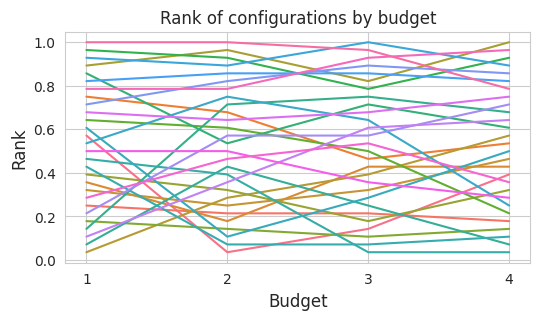

In [57]:
sns.lineplot(data=smac_costs, x="budget", y="rank", hue="hyperparameter_str_identifier")
# Remove legend
plt.legend([],[], frameon=False)
plt.xlabel("Budget")
plt.ylabel("Rank")
plt.title("Rank of configurations by budget")
# Set x ticks
plt.xticks([1, 2, 3,4])

# Calcualte Spearmans rank correlation

In [58]:
smac_table = get_logtable(databse_name, table_name, "smac_callbacks")
smac_table = smac_table[smac_table["experiment_id"] ==1]
smac_table = smac_table[smac_table["budget"] == 4]

2024-08-12 15:10:14,967  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-12 15:10:14,967  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-12 15:10:14,968  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-12 15:10:14,968  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-12 15:10:14,968  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-12 15:10:14,968  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-12 15:10:14,968  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-12 15:10:14,969  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-12 15:10:14,969  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-12 15:10:14,969  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-12 15:10:15,039  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-12 15:10:15,189  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-12 15:10:15,279  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-12 15:10:15,280  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-12 15:10:15,281  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-12 15:10:15,282  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-12 15:10:15,283  | py-experimenter - INFO     | Closing all open connections...
2024-08-12 15:10:15,284  | py-experimenter - WARNING  | Tunnels are not started. Please .s

# Same plot with uncertainty due to using final evaluation callback

In [59]:
final_evaluations = get_logtable(databse_name, table_name, "final_evaluation_callback")

2024-08-12 15:10:15,486  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-12 15:10:15,486  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-12 15:10:15,486  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-12 15:10:15,486  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-12 15:10:15,487  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [60]:
final_evaluations.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,worker_number,final_score,final_std,episode_lengths,average_episode_lengths,successfull,dead,time_out,end_states,rewards_per_episode,actions_per_episode
0,1,1,2024-08-08 13:28:50,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",1,-1.267,1.07947,"200,200,200,200,200,2,200,200,200,200",180.2,0.1,0.0,0.9,"TimeOut,TimeOut,TimeOut,TimeOut,TimeOut,Succes...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{0: [[7, 7, 2, 7, 7, 2, 2, 2, 7, 7, 7, 7, 7, 7..."
1,2,1,2024-08-08 13:28:54,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",2,-1.259,1.07445,"6,200,200,200,200,200,200,200,200,200",180.6,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0....","{0: [[3, 2, 6, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3..."
2,3,1,2024-08-08 13:29:01,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",3,-1.078,1.11858,"200,200,200,200,200,1,200,200,200,200",180.1,0.1,0.0,0.9,"TimeOut,TimeOut,TimeOut,TimeOut,TimeOut,Succes...","[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....","{0: [[3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4..."
3,4,1,2024-08-08 13:29:05,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",0,-0.876,1.11278,"200,200,200,200,200,7,200,200,200,200",180.7,0.1,0.0,0.9,"TimeOut,TimeOut,TimeOut,TimeOut,TimeOut,Succes...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{0: [[0, 7, 2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2..."
4,5,1,2024-08-08 13:29:17,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",4,-0.497,1.28105,"7,200,200,200,200,1,5,200,200,200",141.3,0.3,0.0,0.7,"Success,TimeOut,TimeOut,TimeOut,TimeOut,Succes...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [-0.01, ...","{0: [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4..."


# Plot performance by Budget

In [63]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks")
smac_costs = smac_costs[smac_costs["experiment_id"] ==1]

2024-08-12 15:10:30,208  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-12 15:10:30,208  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-12 15:10:30,209  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-12 15:10:30,209  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-12 15:10:30,209  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-12 15:10:30,209  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-12 15:10:30,210  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-12 15:10:30,210  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-12 15:10:30,210  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-12 15:10:30,211  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-12 15:10:30,284  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-12 15:10:30,430  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-12 15:10:30,517  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-12 15:10:30,520  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-12 15:10:30,521  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-12 15:10:30,522  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-12 15:10:30,523  | py-experimenter - INFO     | Closing all open connections...
2024-08-12 15:10:30,524  | py-experimenter - WARNING  | Tunnels are not started. Please .s

([<matplotlib.axis.XTick at 0x742fe87a5e80>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

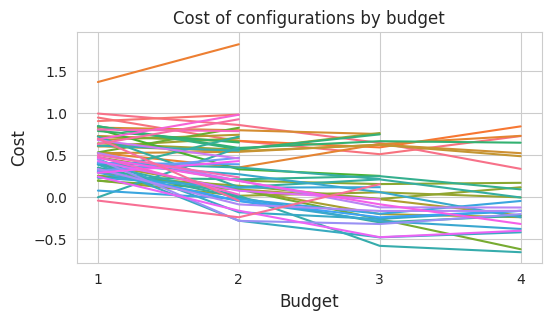

In [64]:
sns.lineplot(data=smac_costs, x="budget", y="cost", hue="hyperparameter_str_identifier")
plt.legend([],[], frameon=False)
plt.xlabel("Budget")
plt.ylabel("Cost")
plt.title("Cost of configurations by budget")
plt.xticks([1, 2, 3,4])